In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
### Had to install openpyxl
data = pd.read_excel('./Real_Estate Data.xlsx')
data

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

#### Cheking the Company Name

In [103]:
data['Company Name'].nunique()

37

#### Checking the Sub-Area

In [104]:
data['Sub-Area'].nunique()

39

### Data Type Conversion

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

#### Price in Lakhs

In [5]:
data['Price in lakhs'] = pd.to_numeric(data['Price in lakhs'], errors='coerce').astype('float').apply(lambda x: 0 if x == 'Null' else x)

#### Property Area in Sq. Ft.

In [6]:
import re

def to_float(x):
    try:
        ans = float(x)
        return ans
    except:
        digits = re.findall('\d+', x)
        add = sum(map(float, digits))
        ans = add / 2
        return ans
    
data['Property Area in Sq. Ft.'] = data['Property Area in Sq. Ft.'].apply(to_float)


### MISSINGNESS

In [7]:
data[data['Total TownShip Area in Acres'].isnull()]

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
39,40,"Pune, Maharashtra, India",Keshav Nagar,1BHK,543.0,42.00,4.200,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
40,41,"Pune, Maharashtra, India",Keshav Nagar,2BHK,963.0,57.00,5.700,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
41,42,"Pune, Maharashtra, India",Keshav Nagar,3BHK,1705.0,NaN,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
42,43,"Pune, Maharashtra, India",KirkatWadi Sinhagad Road,1BHK,320.0,14.00,1.400,Mantra Properties,7Hills,NaN,Yes,No,No,No,Yes,Yes,Yes
43,44,"Pune, Maharashtra, India",KirkatWadi Sinhagad Road,2BHK,473.0,22.00,2.200,Mantra Properties,7Hills,NaN,Yes,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,"Pune, Maharashtra, India",bavdhan,2bhk,641.0,64.99,6.499,vijaya Laxmi infrarealtors,Satyam Shery,NaN,yes,no,no,no,yes,no,no
190,191,"Pune, Maharashtra, India",bavdhan,2bhk,665.0,64.99,6.499,vijaya Laxmi infrarealtors,Satyam Shery,NaN,yes,no,no,no,yes,no,no
191,192,"Pune, Maharashtra, India",talegoan,1bhk,280.0,13.19,1.319,Calyx Spaces,Atulya Kanhe,NaN,yes,no,no,no,yes,yes,yes
192,193,"Pune, Maharashtra, India",talegoan,2bhk,385.0,17.29,1.729,Calyx Spaces,Atulya Kanhe,NaN,yes,no,no,no,yes,no,yes


#### The Total TownShip Area in Acres Column had a higher percentage of missing values thus does not hold influential capabilities in the dataset 

In [8]:
data = data.drop(columns=['Total TownShip Area in Acres'])

#### All the data in the set had the same location "Pune, Maharashtra, India" Hence no need for the location column

In [9]:
data['Location'].nunique()

1

In [10]:
data = data.drop(columns=['Location'])

### ENCODING

#### Label Encoding Sub-Area

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sub-Area Label'] = le.fit_transform(data['Sub-Area'])

In [88]:
le.classes_

array(['Akurdi', 'BANER', 'BT Kawade RD', 'Balewadi', 'Baner', 'Bavdhan',
       'Hinjewadi ', 'Karvanagar ', 'Keshav Nagar', 'Kharadi',
       'KirkatWadi Sinhagad Road', 'Koregaon Park', 'Mahalunge',
       'Mundhwa', 'NIBM', 'Ravet', 'Susgaon ', 'Undri ', 'baner',
       'bavdhan', 'bavdhan budruk ', 'dhanori ', 'hadapsar', 'handewadi',
       'kayani nagar', 'kiwale', 'koregoan', 'lonavala', 'magarpatta ',
       'mahalunge', 'manjri ', 'mohammadwadi ', 'pimpri pune', 'pisoli',
       'ravet ', 'talegoan ', 'tathawade', 'vimannagar', 'wadgaon sheri '],
      dtype=object)

#### Label Encoding Propert Type

In [12]:
data['Propert Type Label'] = le.fit_transform(data['Propert Type'])

In [91]:
le.classes_

array(['1 BHK', '1 bhk', '1BHK', '1bhk', '1bhk ', '2 BHK', '2 bhk',
       '2 bhk ', '2+2 bhk', '2.5 BHK', '2.5 bhk', '2BHK', '2bhk', '2bhk ',
       '3  bhk ', '3 BHK', '3 BHK ', '3 BHK Grand', '3 bhk', '3+2bhk ',
       '3.5 bhk', '3.5bhk', '3BHK', '3bhk', '3bhk ', '4 bhk', '4.5bhk',
       '4BHK', '4bhk', '5 bhk', '5BHK', '6BHK', 'shop'], dtype=object)

#### Label Encoding Company Name

In [13]:
data['Company Name Label'] = le.fit_transform(data['Company Name'])

#### Label Encoding Township

In [14]:
data['TownShip/Society Label'] = le.fit_transform(data['TownShip Name/ Society Name'])

#### Label Encoding ClubHouse

##### Editing the data in Clubhouse

In [15]:
def edit_words(x):
    if x == 'yes':
        return 'Yes'
    elif x == 'no ':
        return 'No'
    elif x == 'no':
        return 'No'
    else:
        return x

In [16]:
data['ClubHouse'] = data['ClubHouse'].apply(edit_words)

In [17]:
data['ClubHouse Label'] = le.fit_transform(data['ClubHouse'])

#### Label Encoding 'School / University in Township '

In [18]:
data['School / University in Township '].value_counts()

School / University in Township 
no     140
No      54
Yes      6
Name: count, dtype: int64

In [19]:
def edit_school(x):
    if x == 'no':
        return 'No'
    else: 
        return x
    
data['School / University in Township '] = data['School / University in Township '].apply(edit_school)

In [20]:
data['School / University Label'] = le.fit_transform(data['School / University in Township '])

In [21]:
pd.options.display.max_columns = 100

In [22]:
data

,Sr. No.,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Sub-Area Label,Propert Type Label,Company Name Label,TownShip/Society Label,ClubHouse Label,School / University Label
0,1,Bavdhan,1 BHK,492.0,39.00,3.900,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,0,13,36,1,1
1,2,Bavdhan,2 BHK,774.0,65.00,6.500,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,5,13,36,1,1
2,3,Bavdhan,3 BHK,889.0,74.00,7.400,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,15,13,36,1,1
3,4,Bavdhan,3 BHK Grand,1018.0,89.00,8.900,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,17,13,36,1,1
4,5,Mahalunge,2BHK,743.0,74.00,7.400,Godrej Properties,Godrej Hills retreat,Yes,Yes,Yes,Yes,Yes,Yes,Yes,12,11,4,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,BANER,3bhk,1350.0,160.00,16.000,SUPREME,SUPREME ESTIA,Yes,No,no,no,yes,yes,yes,1,23,12,25,1,0
196,197,BANER,4bhk,800.0,230.00,23.000,SUPREME,SUPREME ESTIA,Yes,No,no,no,yes,yes,yes,1,28,12,25,1,0
197,198,BANER,2 bhk,789.0,95.00,9.500,Tejraaj Group,TEJ ELEVIA,No,No,no,no,yes,yes,yes,1,6,15,32,0,0
198,199,BANER,3 bhk,1107.0,135.00,13.500,Tejraaj Group,TEJ ELEVIA,No,No,no,no,yes,yes,yes,1,18,15,32,0,0


#### Label Encoding Hospital in Township

In [23]:
data['Hospital in TownShip'].value_counts()

Hospital in TownShip
no     133
No      61
Yes      6
Name: count, dtype: int64

In [24]:
def edit_hospital(x):
    if x == 'no':
        return 'No'
    else:
        return x
    
data['Hospital in TownShip'] = data['Hospital in TownShip'].apply(edit_hospital)

In [25]:
data['Hospital Label'] = le.fit_transform(data['Hospital in TownShip'])

#### Label Encoding Mall in Township

In [26]:
data['Mall in TownShip'].value_counts()

Mall in TownShip
no     78
No     61
no     55
Yes     6
Name: count, dtype: int64

In [27]:
def edit_mall(x):
    if x == 'no ':
        return 'No'
    elif x == 'no':
        return 'No'
    else:
        return x
    
data['Mall in TownShip'] = data['Mall in TownShip'].apply(edit_mall)

In [28]:
data['Mall Label'] = le.fit_transform(data['Mall in TownShip'])

#### Label Encoding Park / Jogging track

In [29]:
data['Park / Jogging track'].value_counts()

Park / Jogging track
yes    141
Yes     55
no       3
No       1
Name: count, dtype: int64

In [30]:
def edit_park(x):
    if x == 'no':
        return 'No'
    elif x == 'yes':
        return 'Yes'
    else:
        return x
    
data['Park / Jogging track'] = data['Park / Jogging track'].apply(edit_park)

In [31]:
data['Park/Jogging Label'] = le.fit_transform(data['Park / Jogging track'])

#### Label Encoding Swimming Pool

In [31]:
data['Swimming Pool'].value_counts()

Swimming Pool
yes    75
Yes    52
no     48
No     19
no      6
Name: count, dtype: int64

In [32]:
def edit_pool(x):
    if x == 'no':
        return 'No'
    elif x == 'no ':
        return 'No'
    elif x == 'yes':
        return 'Yes'
    else:
        return x
    
data['Swimming Pool'] = data['Swimming Pool'].apply(edit_pool)

In [33]:
data['Swimming Pool Label'] = le.fit_transform(data['Swimming Pool'])

#### Label Encoding Gym

In [34]:
data['Gym'].value_counts()

Gym
yes    103
Yes     59
no      32
no       6
Name: count, dtype: int64

In [34]:
def edit_gym(x):
    if x == 'no':
        return 'No'
    elif x == 'no ':
        return 'No'
    elif x == 'yes':
        return 'Yes'
    else:
        return x
    
data['Gym'] = data['Gym'].apply(edit_gym)

In [35]:
data['Gym Label'] = le.fit_transform(data['Gym'])

#### Remove Entry without price 

In [36]:
data = data[data['Price in Millions'].notnull()]

In [37]:
data

,Sr. No.,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Sub-Area Label,Propert Type Label,Company Name Label,TownShip/Society Label,ClubHouse Label,School / University Label,Hospital Label,Mall Label,Park/Jogging Label,Swimming Pool Label,Gym Label
0,1,Bavdhan,1 BHK,492.0,39.00,3.900,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,0,13,36,1,1,1,1,1,1,1
1,2,Bavdhan,2 BHK,774.0,65.00,6.500,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,5,13,36,1,1,1,1,1,1,1
2,3,Bavdhan,3 BHK,889.0,74.00,7.400,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,15,13,36,1,1,1,1,1,1,1
3,4,Bavdhan,3 BHK Grand,1018.0,89.00,8.900,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,17,13,36,1,1,1,1,1,1,1
4,5,Mahalunge,2BHK,743.0,74.00,7.400,Godrej Properties,Godrej Hills retreat,Yes,Yes,Yes,Yes,Yes,Yes,Yes,12,11,4,9,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,BANER,3bhk,1350.0,160.00,16.000,SUPREME,SUPREME ESTIA,Yes,No,No,No,Yes,Yes,Yes,1,23,12,25,1,0,0,0,1,1,1
196,197,BANER,4bhk,800.0,230.00,23.000,SUPREME,SUPREME ESTIA,Yes,No,No,No,Yes,Yes,Yes,1,28,12,25,1,0,0,0,1,1,1
197,198,BANER,2 bhk,789.0,95.00,9.500,Tejraaj Group,TEJ ELEVIA,No,No,No,No,Yes,Yes,Yes,1,6,15,32,0,0,0,0,1,1,1
198,199,BANER,3 bhk,1107.0,135.00,13.500,Tejraaj Group,TEJ ELEVIA,No,No,No,No,Yes,Yes,Yes,1,18,15,32,0,0,0,0,1,1,1


<BarContainer object of 10 artists>

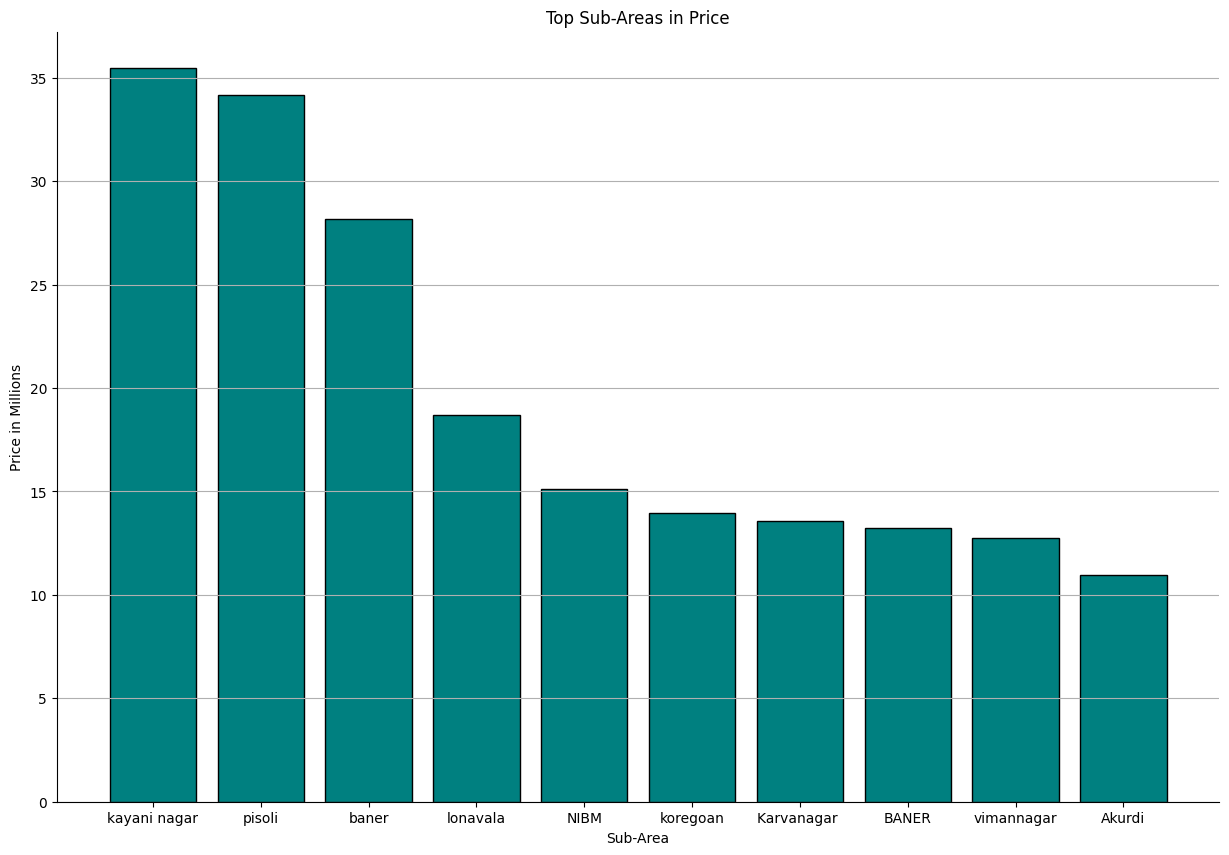

In [38]:
top_sub_area = data.loc[:,['Sub-Area', 'Price in Millions', 'Price in lakhs']].groupby('Sub-Area').agg(
    avg_price_in_millions=('Price in Millions', 'mean'),
    avg_price_in_lakhs=('Price in lakhs', 'mean'
)).reset_index()
top_sub_area = top_sub_area.sort_values(by='avg_price_in_millions', ascending=False)

fig, ax = plt.subplots(figsize=(15,10))

xx = top_sub_area['Sub-Area'].head(10)
yy = top_sub_area['avg_price_in_millions'].head(10)

plt.grid(axis='y')
plt.title('Top Sub-Areas in Price')
ax.set_ylabel('Price in Millions')
ax.set_xlabel('Sub-Area')
sns.despine()
plt.bar(xx, yy, color='teal', ec='black')


### Model Data

In [39]:
first_columns = ['Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions']
range_columns = data.loc[:, 'Sub-Area Label':].columns.tolist()

model_data = data.loc[:, range_columns + first_columns]

In [40]:
model_data

,Sub-Area Label,Propert Type Label,Company Name Label,TownShip/Society Label,ClubHouse Label,School / University Label,Hospital Label,Mall Label,Park/Jogging Label,Swimming Pool Label,Gym Label,Property Area in Sq. Ft.,Price in lakhs,Price in Millions
0,5,0,13,36,1,1,1,1,1,1,1,492.0,39.00,3.900
1,5,5,13,36,1,1,1,1,1,1,1,774.0,65.00,6.500
2,5,15,13,36,1,1,1,1,1,1,1,889.0,74.00,7.400
3,5,17,13,36,1,1,1,1,1,1,1,1018.0,89.00,8.900
4,12,11,4,9,1,1,1,1,1,1,1,743.0,74.00,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,23,12,25,1,0,0,0,1,1,1,1350.0,160.00,16.000
196,1,28,12,25,1,0,0,0,1,1,1,800.0,230.00,23.000
197,1,6,15,32,0,0,0,0,1,1,1,789.0,95.00,9.500
198,1,18,15,32,0,0,0,0,1,1,1,1107.0,135.00,13.500


### Analysing X and y

In [41]:
X = model_data.drop(columns=['Price in lakhs', 'Price in Millions'])
y = pd.DataFrame(model_data['Price in Millions'] )

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X

array([[0.13157895, 0.        , 0.36111111, ..., 1.        , 1.        ,
        0.16238218],
       [0.13157895, 0.15625   , 0.36111111, ..., 1.        , 1.        ,
        0.2832048 ],
       [0.13157895, 0.46875   , 0.36111111, ..., 1.        , 1.        ,
        0.33247644],
       ...,
       [0.02631579, 0.1875    , 0.41666667, ..., 1.        , 1.        ,
        0.28963153],
       [0.02631579, 0.5625    , 0.41666667, ..., 1.        , 1.        ,
        0.42587832],
       [0.02631579, 0.40625   , 0.47222222, ..., 1.        , 1.        ,
        0.2840617 ]])

In [47]:
X.shape

(199, 12)

In [48]:
y.shape

(199, 1)

Relationship Is Non-Linear

### Train and Test Splitting

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Transforming the data

In [50]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train)

LinearRegression()

In [51]:
y_train_prediction = lin.predict(X_train)
y_test_prediction = lin.predict(X_test)

### Evaluating Prediction
`without regularization`

In [52]:
from sklearn.metrics import mean_squared_error

print('Train', mean_squared_error(y_train, y_train_prediction))
print('Test', mean_squared_error(y_test, y_test_prediction))

Train 85.7478733322895
Test 19.739099502106026


In [53]:
from sklearn.metrics import r2_score

print('Train Score', r2_score(y_train, y_train_prediction))
print('Test Score', r2_score(y_test, y_test_prediction))

Train Score 0.253436908986436
Test Score 0.6462024736814294


In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Trannsforming X_train
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X_train)

In [55]:
# Transforming X_test
X_test_poly = poly.fit_transform(X_test)

In [56]:
X_poly.shape

(159, 18564)

In [57]:
# Fitting a linear regression on the transformed data
poly_model = LinearRegression()

poly_model.fit(X_poly, y_train)

LinearRegression()

In [58]:
poly_y_train_prediction = poly_model.predict(X_poly)
poly_y_test_prediction = poly_model.predict(X_test_poly)

In [59]:
poly_y_test_prediction.shape

(40, 1)

In [161]:
poly_y_train_prediction.shape

(159, 1)

In [60]:
# Evaluating the errors in the polynomial regression
print('Train error',mean_squared_error(y_train, poly_y_train_prediction))
print('Test error',mean_squared_error(y_test, poly_y_test_prediction))

Train error 8.006011315659651e-21
Test error 326643.5728991406


#### Ridge Regularization

In [65]:
from sklearn.linear_model import Ridge
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


for i in lambdas:
    degree = 6

    # Define variable for the PolynomialFeatures for transformation
    poly_ridge = PolynomialFeatures(degree)

    # Transform X_train
    X_train_ridge_poly = poly_ridge.fit_transform(X_train)

    # Define variable for Ridge and pass in lambdas
    ridge_reg = Ridge(alpha=i)

    # fit the training transformed set
    ridge_reg.fit(X_train_ridge_poly, y_train)

    # Get the prediction of X_train_ridge_poly
    y_train_ridge_prediction = ridge_reg.predict(X_train_ridge_poly)

    # Get the prediction of X_test
    y_test_ridge_prediction = ridge_reg.predict(poly_ridge.fit_transform(X_test))

    # r2_score
    print('train r2 score =', r2_score(y_train, y_train_ridge_prediction))
    print('test r2 score =', r2_score(y_test, y_test_ridge_prediction))
    # print('\n')

    

c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


train r2 score = 0.9999998387732699
test r2 score = -177.79960210773956
train r2 score = 0.9992524279455018
test r2 score = -1.790086265320297
train r2 score = 0.9964754879221546
test r2 score = -3.403004990739146
train r2 score = 0.9771635559113812
test r2 score = -1.8997730240917137
train r2 score = 0.8792182080263751
test r2 score = -0.009816053756057208
train r2 score = 0.723994459962426
test r2 score = 0.17794711182176048
train r2 score = 0.5387276234733924
test r2 score = 0.41528964508219235
train r2 score = 0.3240337728344488
test r2 score = 0.4774332344209339


### Lasso Regularization

In [ ]:
for i in lambdas:
    degree = 6
    